In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cPickle

BIRD_CODE = {  # filtered by Dropping_Threshold = 10
    'Oecanthus': 0, 'Bubo': 1, 'Garrulus': 2, 'Bucephala': 3, 'Gallinago': 4, 'Oriolus': 5, 
    'Columba': 6, 'Perdix': 7, 'Anas': 8, 'Amazona': 9, 'Passer': 10, 'Aegolius': 11, 
    'Streptopelia': 12, 'Sturnus': 13, 'Motacilla': 14, 'Panurus': 15, 'Phalacrocorax': 16, 
    'Coloeus': 17, 'Chlidonias': 18, 'Apus': 19, 'Actitis': 20, 'Rallus': 21, 'Branta': 22, 
    'Recurvirostra': 23, 'Nycticorax': 24, 'Falco': 25, 'Jynx': 26, 'Carduelis': 27, 'Haliaeetus': 28, 
    'Dendrocopos': 29, 'Buteo': 30, 'Ficedula': 31, 'Emberiza': 32, 'Corvus': 33, 'Regulus': 34, 
    'Pluvialis': 35, 'Sylvia': 36, 'Aegithalos': 37, 'Dryocopus': 38, 'Carpodacus': 39, 
    'Botaurus': 40, 'Phoenicurus': 41, 'Muscicapa': 42, 'Troglodytes': 43, 'Coturnix': 44, 
    'Otus': 45, 'Saxicola': 46, 'Mergus': 47, 'Ixobrychus': 48, 'Tadorna': 49, 'Psittacula': 50, 
    'Remiz': 51, 'Charadrius': 52, 'Larus': 53, 'Poecile': 54, 'Haematopus': 55, 'Cyanistes': 56, 
    'Crex': 57, 'Glaucidium': 58, 'Acrocephalus': 59, 'Coccothraustes': 60, 'Fulica': 61, 'Linaria': 62, 
    'Luscinia': 63, 'Hippolais': 64, 'Sitta': 65, 'Porzana': 66, 'Anthus': 67, 'Upupa': 68, 'Spatula': 69, 
    'Phylloscopus': 70, 'Strix': 71, 'Mareca': 72, 'Picus': 73, 'Riparia': 74, 'Dryobates': 75, 
    'Sonus': 76, 'Tyto': 77, 'Chloris': 78, 'Lullula': 79, 'Podiceps': 80, 'Ardea': 81, 'Circus': 82, 
    'Hirundo': 83, 'Pica': 84, 'Alopochen': 85, 'Chroicocephalus': 86, 'Numenius': 87, 'Accipiter': 88, 
    'Alcedo': 89, 'Grus': 90, 'Athene': 91, 'Aythya': 92, 'Caprimulgus': 93, 'Locustella': 94, 
    'Gallinula': 95, 'Lophophanes': 96, 'Delichon': 97, 'Phasianus': 98, 'Acanthis': 99, 'Parus': 100, 
    'Anser': 101, 'Scolopax': 102, 'Turdus': 103, 'Limosa': 104, 'Spinus': 105, 'Serinus': 106, 
    'Prunella': 107, 'Periparus': 108, 'Certhia': 109, 'Loxia': 110, 'Bombycilla': 111, 'Sterna': 112, 
    'Asio': 113, 'Merops': 114, 'Pyrrhula': 115, 'Lanius': 116, 'Fringilla': 117, 'Erithacus': 118, 
    'Aix': 119, 'Cuculus': 120, 'Calidris': 121, 'Tringa': 122, 'Tachybaptus': 123, 'Cinclus': 124, 
    'Dendrocoptes': 125, 'Milvus': 126, 'Vanellus': 127, 'Cygnus': 128, 'Alauda': 129
}
INV_BIRD_CODE = {v: k for k, v in BIRD_CODE.items()}

In [2]:
df = pd.read_csv("Germany_Birdcall_resampled_filtered.csv")

classes_num = len(BIRD_CODE)  # 130
samples_num_per_class = np.zeros(classes_num)
count_df = df["gen"].value_counts()
for class_idx in range(classes_num):
    samples_num_per_class[class_idx] = count_df[INV_BIRD_CODE[class_idx]]

print(samples_num_per_class)

[  10.   48.  351.   13.   38.  174.   91.   18.   68.   23.  290.   22.
   55.  108.  121.   22.   14.   43.   20.   38.   38.   84.   51.   14.
   13.   48.   48.   67.   20.  353.   84.  148.  599.  433.  403.   49.
  989.  187.  250.   36.   39.  167.   81.  347.   54.   14.   91.   13.
   29.   39.   31.   12.   69.   49.  373.   28.  377.   43.   37.  402.
  120.   74.   82.  269.  136.  246.   51.  244.   33.   13. 1101.  237.
   35.  261.   12.   80. 2561.   32.  135.   75.   23.   97.   15.   37.
   65.   24.   39.   66.  162.  113.   73.   14.   22.   38.  141.   48.
  132.   26.   24.   33.  846.  135.   71. 1960.   14.  146.   51.  139.
  248.  323.  298.   18.   31.   63.   11.  221.   80.  508.  643.   17.
  113.   34.  141.   36.   30.   81.   47.   22.   76.  119.]


In [3]:
classIdx_des = np.array(samples_num_per_class).argsort()[::-1]
classIdx_des
print(samples_num_per_class[classIdx_des])
bird_code_in_oder = [INV_BIRD_CODE[idx] for idx in iter(classIdx_des)]
print("Corresponding classes:")
print(bird_code_in_oder)

[2561. 1960. 1101.  989.  846.  643.  599.  508.  433.  403.  402.  377.
  373.  353.  351.  347.  323.  298.  290.  269.  261.  250.  248.  246.
  244.  237.  221.  187.  174.  167.  162.  148.  146.  141.  141.  139.
  136.  135.  135.  132.  121.  120.  119.  113.  113.  108.   97.   91.
   91.   84.   84.   82.   81.   81.   80.   80.   76.   75.   74.   73.
   71.   69.   68.   67.   66.   65.   63.   55.   54.   51.   51.   51.
   49.   49.   48.   48.   48.   48.   47.   43.   43.   39.   39.   39.
   38.   38.   38.   38.   37.   37.   36.   36.   35.   34.   33.   33.
   32.   31.   31.   30.   29.   28.   26.   24.   24.   23.   23.   22.
   22.   22.   22.   20.   20.   18.   18.   17.   15.   14.   14.   14.
   14.   14.   13.   13.   13.   13.   12.   12.   11.   10.]
Corresponding classes:
['Sonus', 'Turdus', 'Phylloscopus', 'Sylvia', 'Parus', 'Erithacus', 'Emberiza', 'Fringilla', 'Corvus', 'Regulus', 'Acrocephalus', 'Cyanistes', 'Poecile', 'Dendrocopos', 'Garrulus', 'Tro

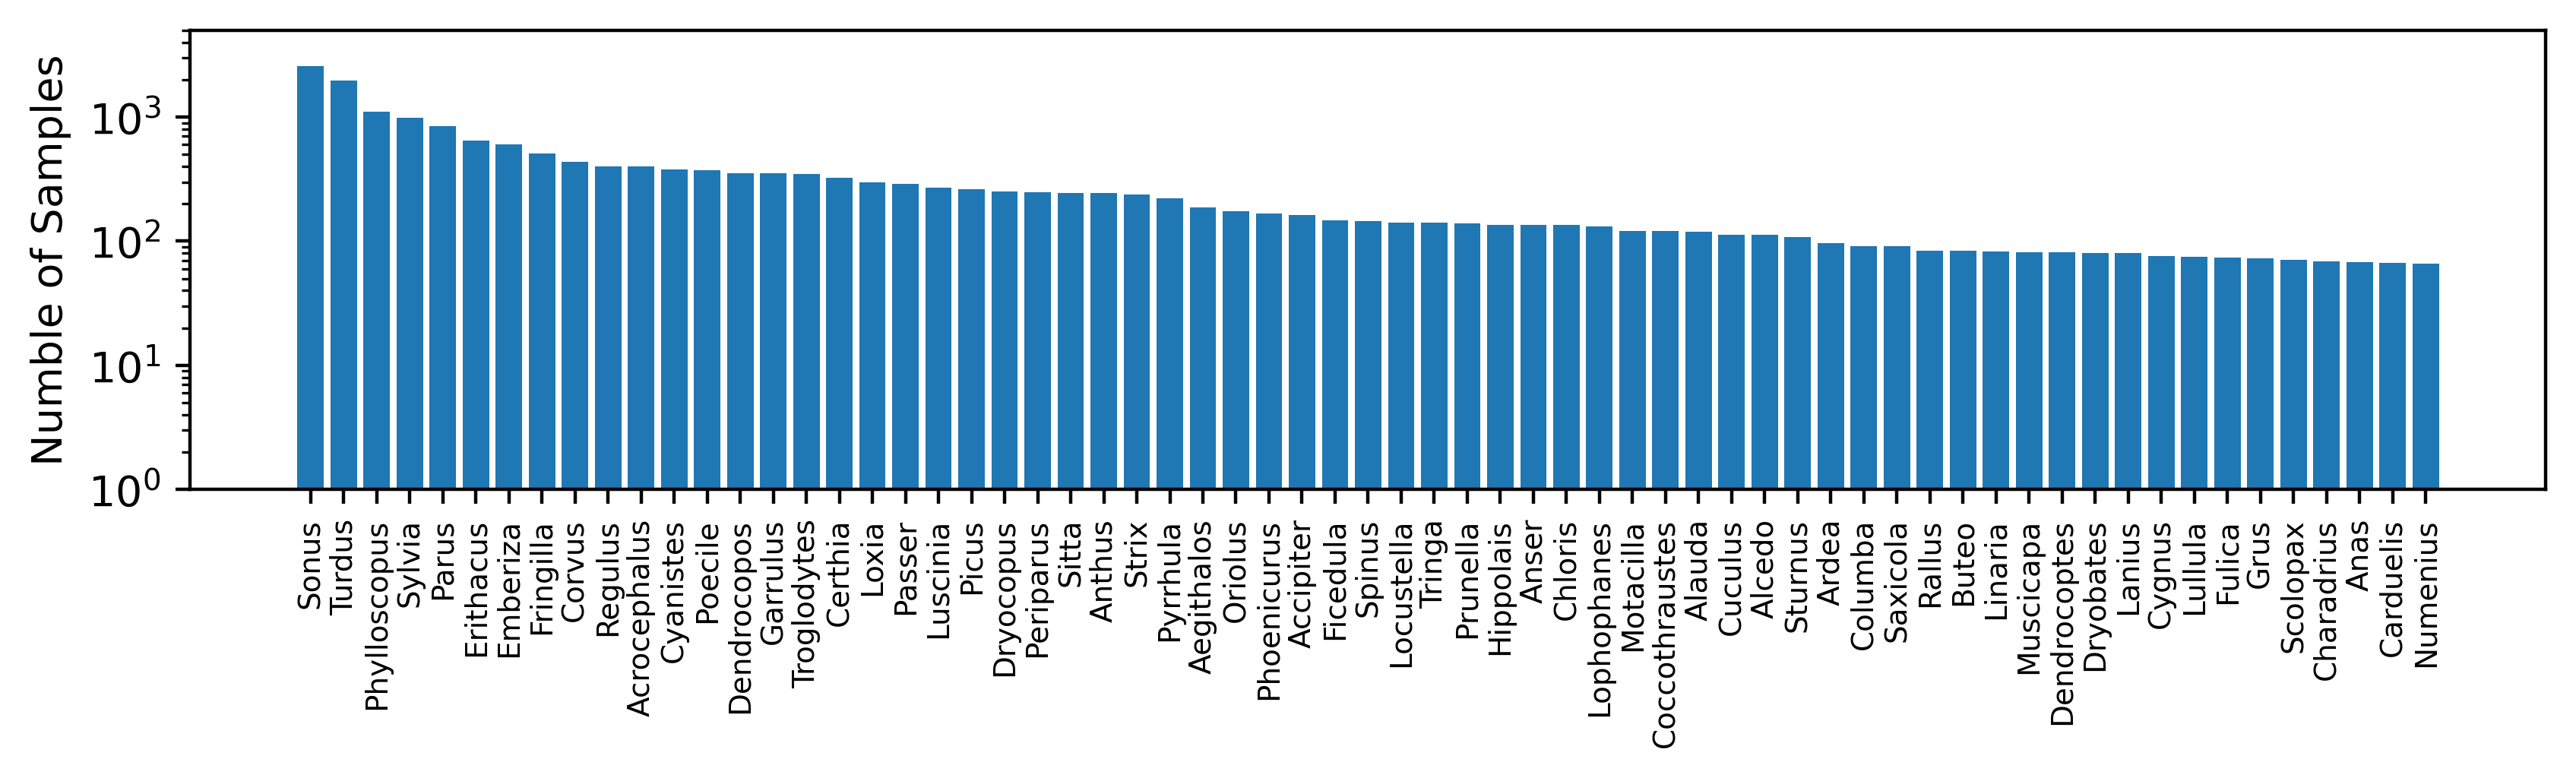

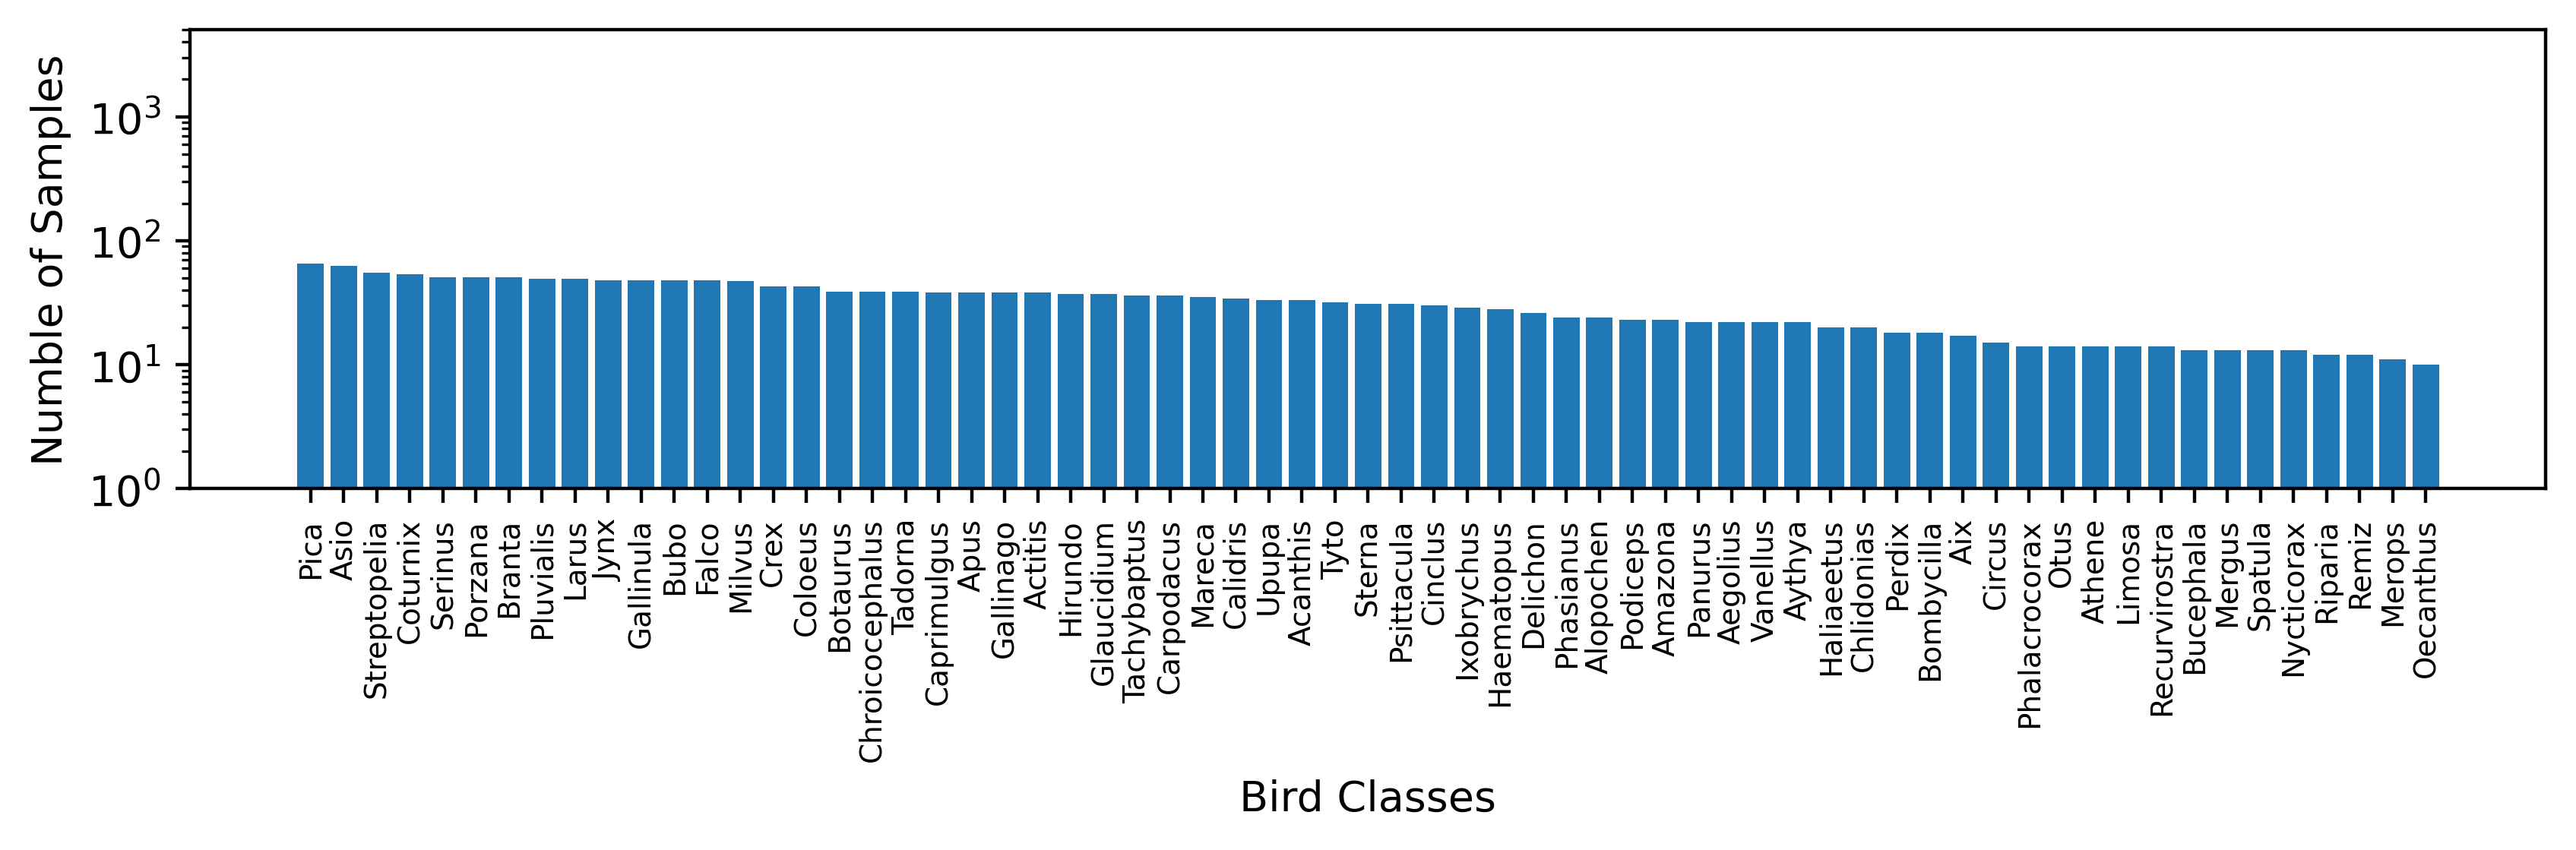

In [4]:
fig = plt.figure(figsize=(10, 2), dpi=400)
# plt.xlabel('Bird Classes')
plt.xticks(rotation=90, size=7)
plt.ylabel('Numble of Samples')
plt.yscale('log')
plt.ylim([1,5000])
plt.bar(bird_code_in_oder[:65], samples_num_per_class[classIdx_des][:65])
# plt.grid(True)
plt.show()
# fig.tight_layout()
fig = plt.figure(figsize=(10, 2), dpi=400)
plt.xlabel('Bird Classes')
plt.xticks(rotation=90, size=7)
plt.ylabel('Numble of Samples')
plt.yscale('log')
plt.ylim([1,5000])
plt.bar(bird_code_in_oder[65:], samples_num_per_class[classIdx_des][65:])
# plt.grid(True)
plt.show()

In [5]:
import _pickle as cPickle

def classwise_analysis_for_best_model(statistics_path, metric, classIdx_des):
    '''input:  statistics_path
               metric: "average_precision" or "auc"
               classIdx_des: classIdx in descending order of quantities
       output: classwise_metrics'''
    statistics_dict = cPickle.load(open(statistics_path, 'rb'))
#     print(statistics_dict["test"])
    test_map = np.array([statistics['average_precision'] for statistics in statistics_dict['test']])    # (N, classes_num)
    test_map = np.mean(test_map, axis=-1)  # (N,)
    iterIdx_max = test_map.argmax()
    classwise_metrics = statistics_dict["test"][iterIdx_max][metric]
    return classwise_metrics[classIdx_des]

In [6]:
filename = "Cnn10nonenone.pkl"
statistics_path = filename
Cnn10nonenone_classwise_mAP = classwise_analysis_for_best_model(statistics_path, "average_precision", classIdx_des)
Cnn10nonenone_classwise_auc = classwise_analysis_for_best_model(statistics_path, "auc", classIdx_des)
# Cnn10nonenone_classwise_auc

In [7]:
filename = "Cnn10balancednone.pkl"
statistics_path = filename
Cnn10balancednone_classwise_mAP = classwise_analysis_for_best_model(statistics_path, "average_precision", classIdx_des)
Cnn10balancednone_classwise_auc = classwise_analysis_for_best_model(statistics_path, "auc", classIdx_des)

In [8]:
filename = "Cnn10balancedmixup.pkl"
statistics_path = filename
Cnn10balancedmixup_classwise_mAP = classwise_analysis_for_best_model(statistics_path, "average_precision", classIdx_des)
Cnn10balancedmixup_classwise_auc = classwise_analysis_for_best_model(statistics_path, "auc", classIdx_des)

In [9]:
filename = "Cnn10nonemixup.pkl"
statistics_path = filename
Cnn10nonemixup_classwise_mAP = classwise_analysis_for_best_model(statistics_path, "average_precision", classIdx_des)
Cnn10nonemixup_classwise_auc = classwise_analysis_for_best_model(statistics_path, "auc", classIdx_des)

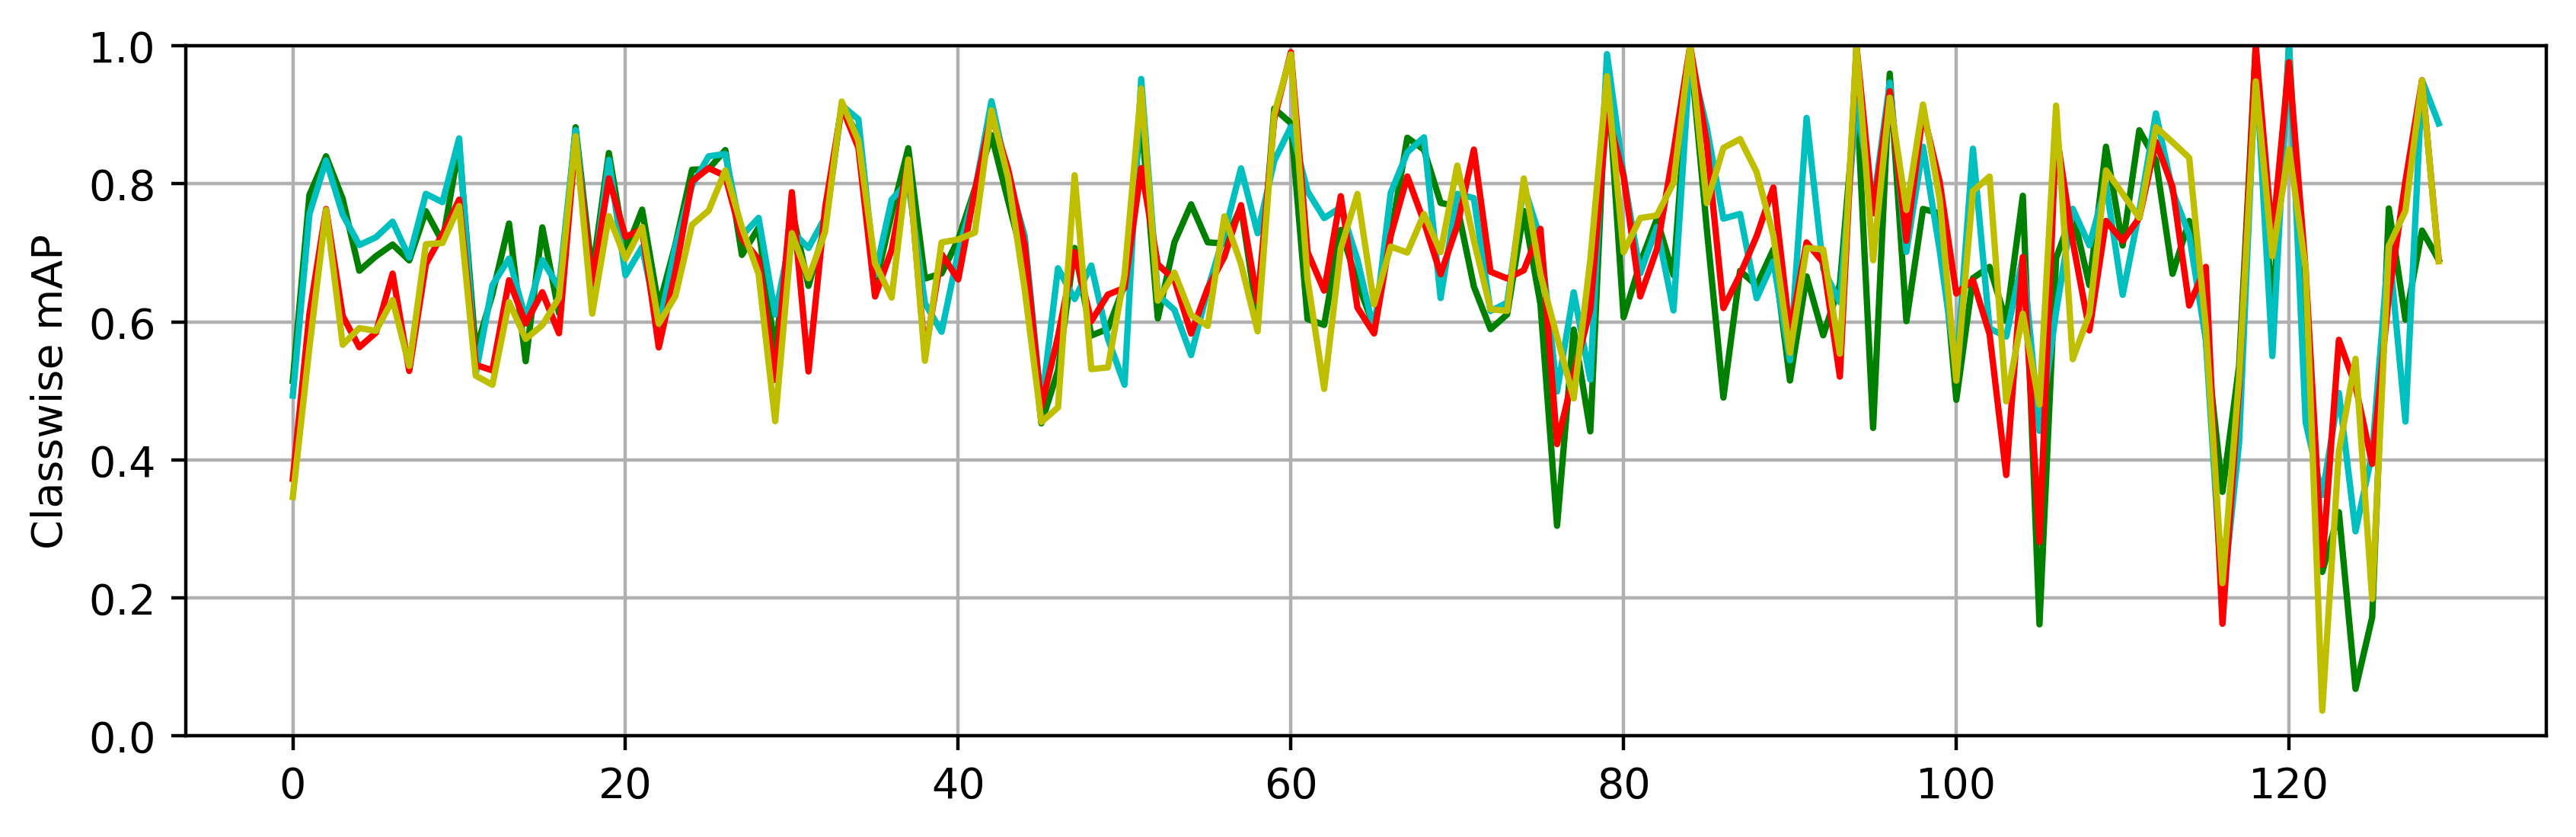

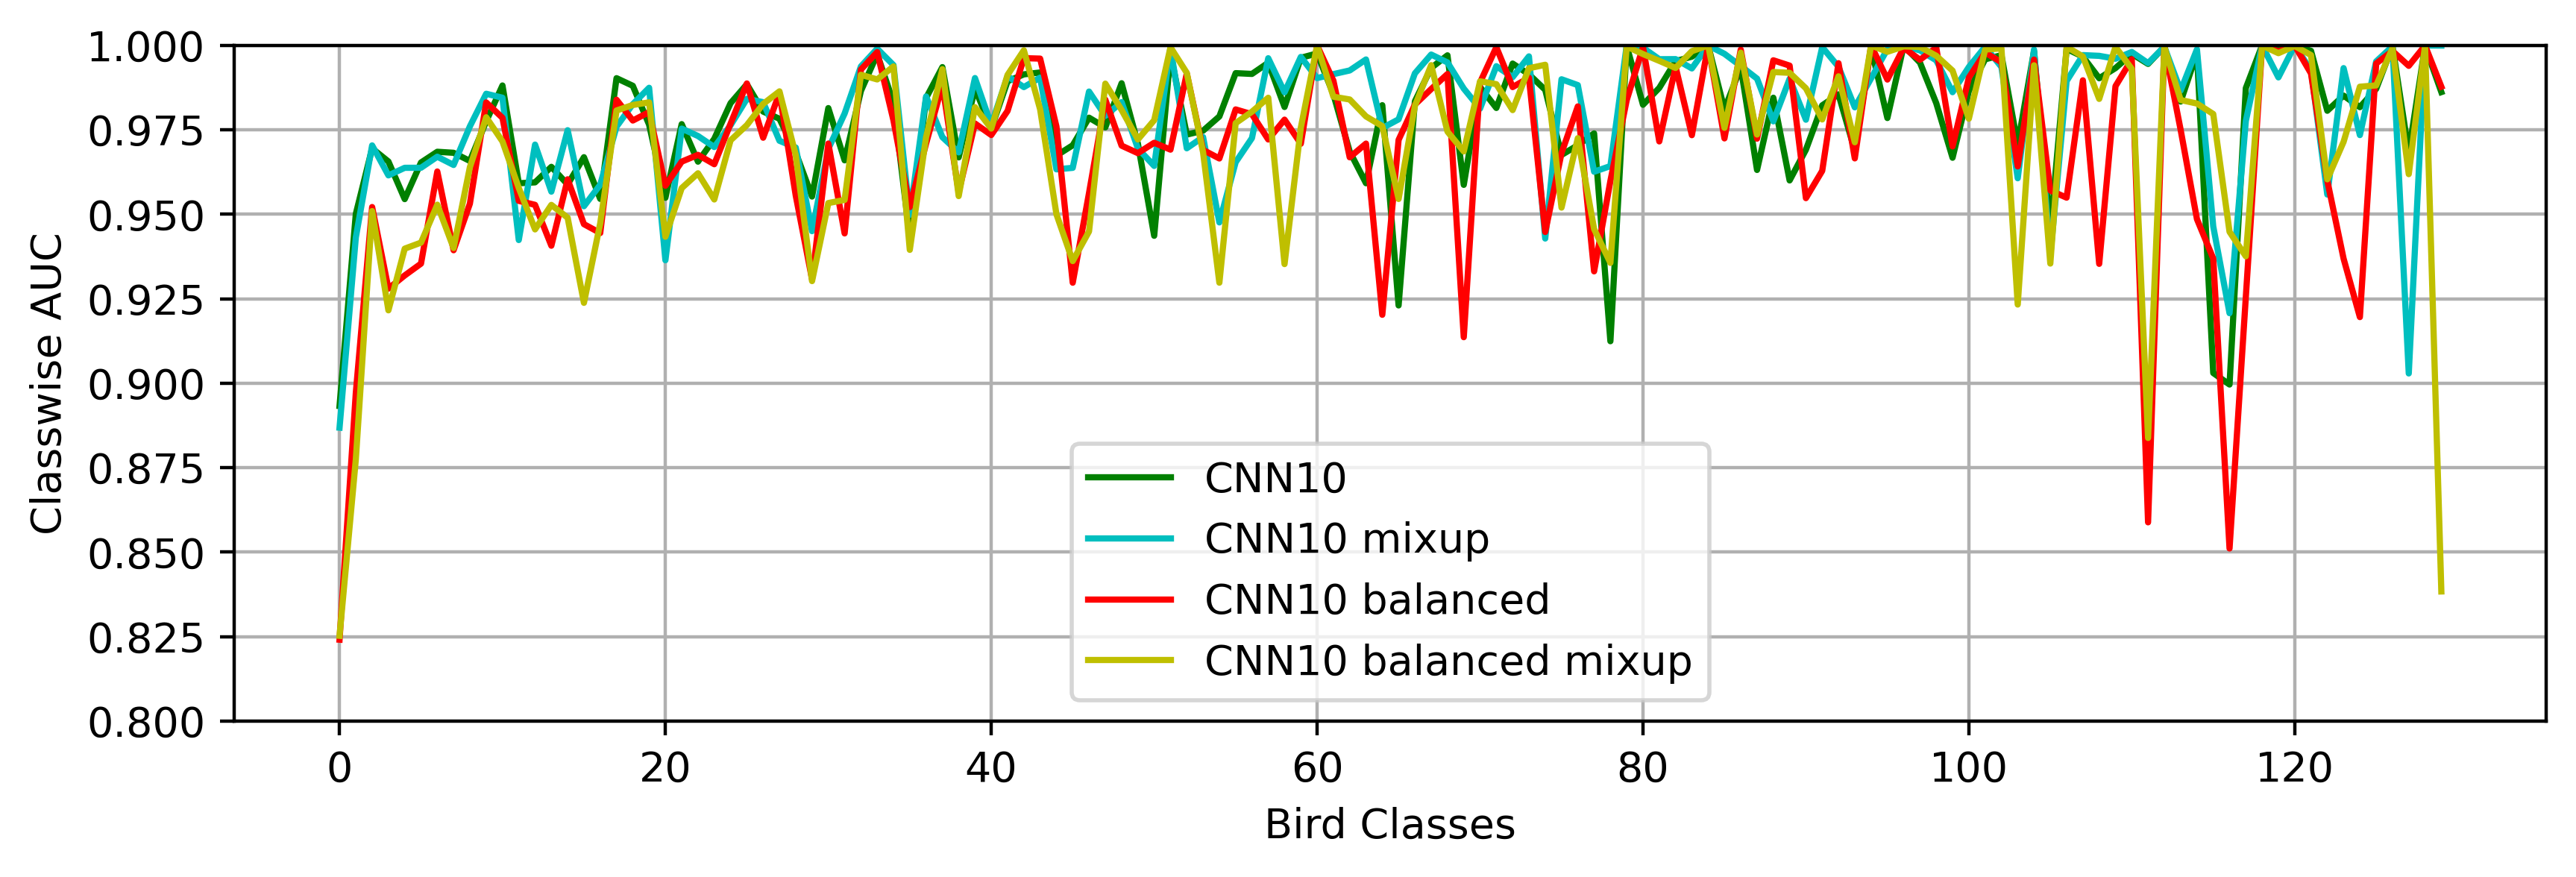

In [10]:
import matplotlib.pyplot as plt
classes = np.arange(130)
fig = plt.figure(figsize=(10, 3), dpi=400)
# plt.xlabel('Bird Classes')
plt.ylabel('Classwise mAP')
plt.ylim([0,1.0])
plt.grid(True)
plt.plot(classes, Cnn10nonenone_classwise_mAP, "g", label = "CNN10")
plt.plot(classes, Cnn10nonemixup_classwise_mAP, "c", label = "CNN10 mixup")
plt.plot(classes, Cnn10balancednone_classwise_mAP, "r", label = "CNN10 balanced")
plt.plot(classes, Cnn10balancedmixup_classwise_mAP, "y", label = "CNN10 balanced mixup")

# plt.legend()
plt.show()
classes = np.arange(130)
fig = plt.figure(figsize=(10, 3), dpi=400)
plt.xlabel('Bird Classes')
plt.ylabel('Classwise AUC')
plt.ylim([0.8,1.0])
plt.grid(True)
plt.plot(classes, Cnn10nonenone_classwise_auc, "g", label = "CNN10")
plt.plot(classes, Cnn10nonemixup_classwise_auc, "c", label = "CNN10 mixup")
plt.plot(classes, Cnn10balancednone_classwise_auc, "r", label = "CNN10 balanced")
plt.plot(classes, Cnn10balancedmixup_classwise_auc, "y", label = "CNN10 balanced mixup")

plt.legend()
plt.show()